In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os, json
from cnet_riff_dataset import CnetRiffDataset, preprocess_batch

/Users/zachary/miniconda3/envs/mel-gen/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# parameters

# names of files to segment
audio_files = ['pop.00000.wav', 'pop.00010.wav']
# folder where raw audio files are located in
audio_files_dir = "../pop-data/"
# where to output everything to
dataset_dir = "train-data"
prompt_file_path = "prompt_labels.json"

preprocess_batch(audio_files = audio_files,
                 audio_files_dir = audio_files_dir,
                 output_dir = dataset_dir,
                 prompt_file_path = prompt_file_path,
                 fs=44100,
                 verbose=False,
                 save_wav=False)

# collect all training data into training object
train_dataset = CnetRiffDataset(dataset_dir)

INFO:tensorflow:Using config: {'_model_dir': 'pretrained_models/2stems', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': gpu_options {
  per_process_gpu_memory_fraction: 0.7
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
Use output_signature instead
Instructions for updating:
Use output_signature instead
INFO:tensorflow:Calling model_fn.
INFO:tensorflo

/Users/zachary/Desktop/Stanford/_Win2023/EE 269/Project/mel-generator/playground/../riffusion-reference/riffusion/spectrogram_image_converter.py:21: UserWarning: WARNING: cuda is not available, using cpu instead.
  self.converter = SpectrogramConverter(params=params, device=device)
100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 60/60 [00:02<00:00, 26.00it/s]


INFO:tensorflow:Using config: {'_model_dir': 'pretrained_models/2stems', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': gpu_options {
  per_process_gpu_memory_fraction: 0.7
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Apply unet for vocals_spectrogram
INFO:tensorflow:Apply unet for accompaniment_spectrogram
INFO:tensorflow:Don

/Users/zachary/Desktop/Stanford/_Win2023/EE 269/Project/mel-generator/playground/../riffusion-reference/riffusion/spectrogram_image_converter.py:21: UserWarning: WARNING: cuda is not available, using cpu instead.
  self.converter = SpectrogramConverter(params=params, device=device)
100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 60/60 [00:02<00:00, 29.74it/s]


Sample contents of dataset


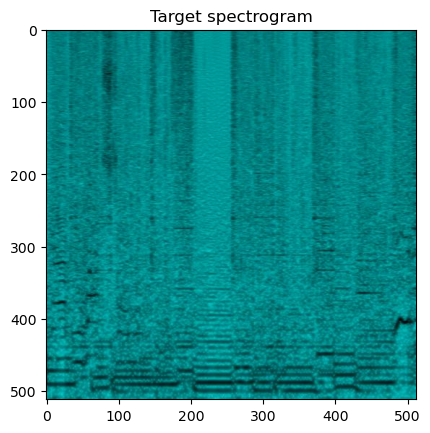

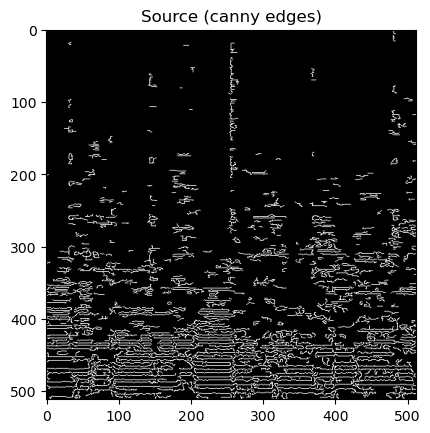

prompt: Generate a subdued male vocal pop melody.
image shape:  (512, 512, 3)


In [3]:
# show sample contents if desired
print("Sample contents of dataset")
item = train_dataset[0];
plt.imshow((item['jpg'] + 1) / 2)
plt.title("Target spectrogram")
plt.show()
plt.figure()
plt.imshow(item['hint'])
plt.title("Source (canny edges)")
plt.show()
print("prompt:", item['txt'])
print("image shape: ", item['hint'].shape)